In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_36047_U')

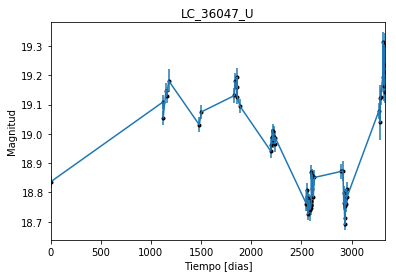

In [2]:
data = np.genfromtxt('LC_36047_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_36047_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

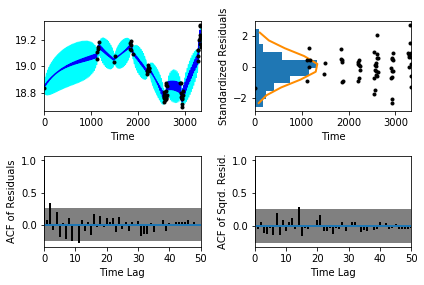

In [5]:
sample.assess_fit()

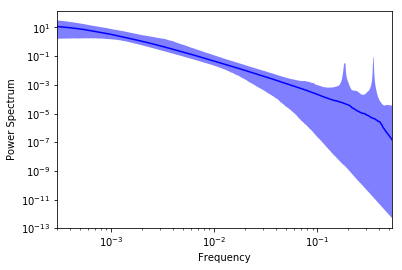

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_36047_U')

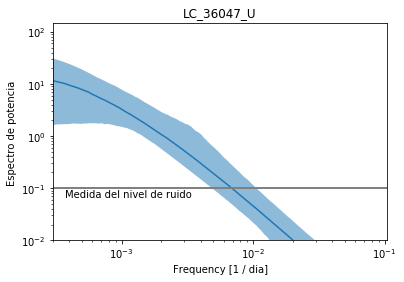

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_36047_U')

Text(0.5,1,'Prediccion , valor esperado LC_36047_U')

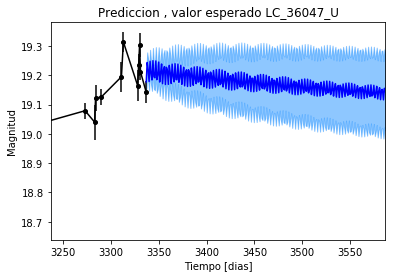

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_36047_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_36047_U')

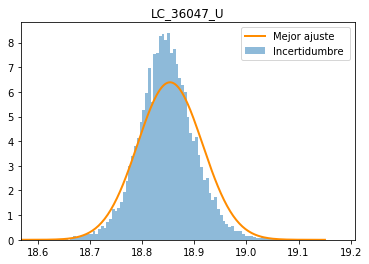

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_36047_U')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_U')

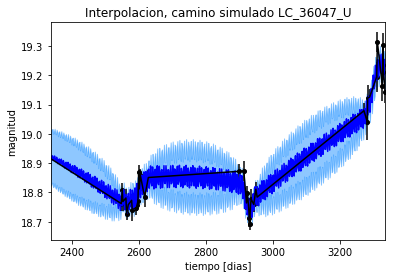

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_U')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_U')

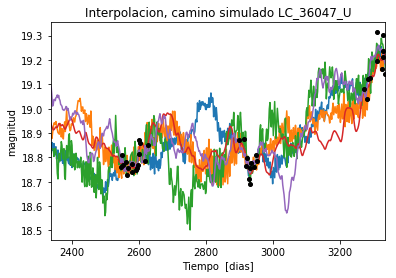

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 250.04529128
Median: 0.00199895755178
Standard deviation: 0.154686697637
68% credibility interval: [ 0.00041876  0.05183237]
95% credibility interval: [  3.27058620e-04   6.06169634e-01]
99% credibility interval: [  3.12748139e-04   1.04321854e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 78.644759614
Median: 0.00151753327097
Standard deviation: 0.117611641576
68% credibility interval: [ 0.00040691  0.03165747]
95% credibility interval: [ 0.00032431  0.31608192]
99% credibility interval: [  3.08242325e-04   1.01767664e+00]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 328.813388544
Median: 0.092581789164
Standard dev

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 150.518049589
Median: 113.929572134
Standard deviation: 3.37754778221
68% credibility interval: [ 110.72093092  117.84256433]
95% credibility interval: [ 107.88448737  119.63979396]
99% credibility interval: [ 105.38555957  120.5121746 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 307.745686626
Median: 0.740282374066
Standard deviation: 2.43744248517
68% credibility interval: [ 0.27024547  3.07821899]
95% credibility interval: [ 0.07519609  7.36971987]
99% credibility interval: [  0.03207581  18.82433289]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 187.676499507
Median: 4.85363382929
Standard deviation: 16.7965595703
68% credibility interval: [  1.24240498  16.7183591 ]
95% credibility interval: [  0.06579002

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 375.260642806
Median: 2.33938138357e-36
Standard deviation: 6.84861117205e+82
68% credibility interval: [  1.08331274e-97   1.44871325e-18]
95% credibility interval: [  2.14215312e-147   9.89535842e+043]
99% credibility interval: [  7.22976464e-149   5.74908056e+083]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 265.299989185
Median: 18.9928580027
Standard deviation: 0.0747576925688
68% credibility interval: [ 18.91909321  19.0627903 ]
95% credibility interval: [ 18.83514574  19.1357866 ]
99% credibility interval: [ 18.78961318  19.18991598]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 323.2411652
Median: 0.348262463231
Standard deviation: 0.265352043359
68% credibility interval: [ 0.08528737  0.64974166]
95% credibility interval: [ 0.          0.94338115]
99% credibility interval: [ 0.          1.04409208]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 323.2411652
Median: 0.348262463231
Standard deviation: 0.265352043359
68% credibility interval: [ 0.08528737  0.64974166]
95% credibility interval: [ 0.          0.94338115]
99% credibility interval: [ 0.          1.04409208]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 482.273634965
Median: 0.0
Standard deviation: 0.000519349667652
68% credibil

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 150.518049589
Median: 113.929572134
Standard deviation: 3.37754778221
68% credibility interval: [ 110.72093092  117.84256433]
95% credibility interval: [ 107.88448737  119.63979396]
99% credibility interval: [ 105.38555957  120.5121746 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 376.414625606
Median: 0.02632832122
Standard deviation: 0.0140094081135
68% credibility interval: [ 0.01691618  0.04148819]
95% credibility interval: [ 0.01224268  0.0613936 ]
99% credibility interval: [ 0.00994672  0.08481371]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 111.433866658
Median: 1.01555057619
Standard deviation: 0.228233383989
68% credibility interval: [ 0.824919    1.27866858]
95% credibility interval: [ 0.69203428  1.56524793]
99% credibility interval: [ 0.61732931  1.78005778]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 191.913288962
Median: 0.0303799984195
Standard deviation: 0.569091143092
68% credibility interval: [ 0.00231579  0.20497743]
95% credibility interval: [  1.83447464e-46   9.99124814e-01]
99% credibility interval: [  1.12647179e-86   4.88980612e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 250.04529128
Median: (-0.012559820719-1.5157782515j)
Standard deviation: 1.92986562657
68% credibility interval: [-0.32567241-0.9075611j  -0.00263114-4.09604886j]
95% credibility interval: [ -3.80867614e+00-3.55119973j  -2.05496992e-03-4.08166086j]
99% credibility interval: [ -6.55473542e+00-5.14041896j  -1.96505451e-03-4.07300367j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 78.644759614
Median: (-0.00953494275132+2.00779670408j)
Standard deviation: 1.82368525564
68% credibility interval: [-0.19890975+1.59353346j -0.00255670+4.07780198j]
95% credibility interval: [-1.98600129+2.00251611j -0.00203773+4.07950688j]
99% credibility interval: [ -6.39425090e+00+0.74897047j  -1.93674365e-03+0.j        ]
Posterior summary